# Ch.6 차원 축소 (Dimension Reduction)

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

# 공분산 행렬

In [9]:
from sklearn.preprocessing import StandardScaler

iris_std = StandardScaler().fit_transform(iris.data) # 표준편차
iris_std[:3, :]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

In [18]:
iris_cov = np.dot(iris_std.T, iris_std) / len(iris_std)
iris_cov

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [22]:
iris_cov1 = np.dot(iris_std.T, iris_std) / len((iris_std)-1)
iris_cov1

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [23]:
np.cov(iris_std.T)

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [29]:
eig_vals1, eig_vecs1 = np.linalg.eig(iris_cov1)

In [30]:
eig_vecs1

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [34]:
PC1 = iris_std.dot(np.reshape(eig_vecs1.T[0], (4, 1)))
PC2 = iris_std.dot(np.reshape(eig_vecs1.T[1], (4, 1)))

In [36]:
PC1

array([[-2.26470281],
       [-2.08096115],
       [-2.36422905],
       [-2.29938422],
       [-2.38984217],
       [-2.07563095],
       [-2.44402884],
       [-2.23284716],
       [-2.33464048],
       [-2.18432817],
       [-2.1663101 ],
       [-2.32613087],
       [-2.2184509 ],
       [-2.6331007 ],
       [-2.1987406 ],
       [-2.26221453],
       [-2.2075877 ],
       [-2.19034951],
       [-1.898572  ],
       [-2.34336905],
       [-1.914323  ],
       [-2.20701284],
       [-2.7743447 ],
       [-1.81866953],
       [-2.22716331],
       [-1.95184633],
       [-2.05115137],
       [-2.16857717],
       [-2.13956345],
       [-2.26526149],
       [-2.14012214],
       [-1.83159477],
       [-2.61494794],
       [-2.44617739],
       [-2.10997488],
       [-2.2078089 ],
       [-2.04514621],
       [-2.52733191],
       [-2.42963258],
       [-2.16971071],
       [-2.28647514],
       [-1.85812246],
       [-2.5536384 ],
       [-1.96444768],
       [-2.13705901],
       [-2

In [38]:
PC2

array([[-0.4800266 ],
       [ 0.67413356],
       [ 0.34190802],
       [ 0.59739451],
       [-0.64683538],
       [-1.48917752],
       [-0.0476442 ],
       [-0.22314807],
       [ 1.11532768],
       [ 0.46901356],
       [-1.04369065],
       [-0.13307834],
       [ 0.72867617],
       [ 0.96150673],
       [-1.86005711],
       [-2.68628449],
       [-1.48360936],
       [-0.48883832],
       [-1.40501879],
       [-1.12784938],
       [-0.40885571],
       [-0.92412143],
       [-0.45834367],
       [-0.08555853],
       [-0.13725446],
       [ 0.62561859],
       [-0.24216355],
       [-0.52714953],
       [-0.31321781],
       [ 0.3377319 ],
       [ 0.50454069],
       [-0.42369507],
       [-1.79357586],
       [-2.15072788],
       [ 0.46020184],
       [ 0.2061074 ],
       [-0.66155811],
       [-0.59229277],
       [ 0.90418004],
       [-0.26887896],
       [-0.44171539],
       [ 2.33741516],
       [ 0.47910069],
       [-0.47232667],
       [-1.14222926],
       [ 0

## PCA 변환

In [42]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

pca.fit(iris_std)
iris_pca = pca.transform(iris_std)
print(iris_pca.shape)

(150, 2)


## 6.2 PCA(Principal Component Analysis)

In [46]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
# transform pandas to DataFrame
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


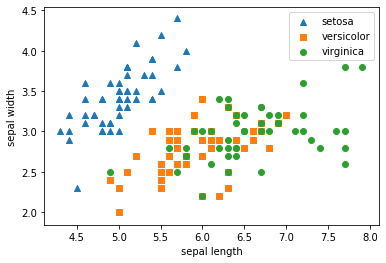

In [50]:
markers = ['^', 's', 'o']

# target[0] = setosa, 1 = versicolor, 2 = virginica
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [52]:
from sklearn.preprocessing import StandardScaler

# 표준 정규 분포로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [58]:
# 데이터 값 확인
pca_columns=['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns = pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


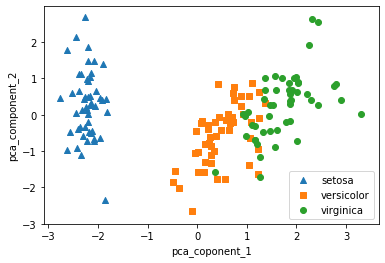

In [61]:
markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('pca_coponent_1')
plt.ylabel('pca_component_2')
plt.show()

In [63]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [68]:
# 원본 데이터 분석
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도 : ', scores)
print('원본 데이터 평균 정확도 : ', np.mean(scores))

원본 데이터 교차 검증 개별 정확도 :  [0.98 0.94 0.96]
원본 데이터 평균 정확도 :  0.96


In [69]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring = 'accuracy', cv=3)
print('PCA 데이터 정확도', scores_pca)
print('PCA 평균 정확도 : ',np.mean(scores_pca))

PCA 데이터 정확도 [0.88 0.88 0.88]
PCA 평균 정확도 :  0.88
